### Debiasing Vector Embeddings - NLP Project by Madhuri Pujari, Dhruv Agarwal and Harish Pal Chauhan

#### Imports

In [1]:
from __future__ import print_function, division
%matplotlib inline
from matplotlib import pyplot as plt
import json
import random
import numpy as np
import json
import os
from utilities.word_embeddings import WordEmbedding
from utilities.plots import *

### 1: Gender Bias in Word Embedding


### Load data
Load the word embedding trained on a corpus of Google News. The embedding maps each word into a 300-dimension vector. 

In [2]:

def load_professions():
    '''
       load data from profession.json 
    '''
    professions_file = os.path.join('./data', 'professions.json')
    with open(professions_file, 'r') as f:
        professions = json.load(f)
    # print('Loaded professions\n' +
    #       'Format:\n' +
    #       'word,\n' +
    #       'definitional female -1.0 -> definitional male 1.0\n' +
    #       'stereotypical female -1.0 -> stereotypical male 1.0')
    return professions


In [3]:
# load google news word2vec
E = WordEmbedding()
E.load_embeddings('./embeddings/w2v_gnews_small.txt')


# load professions
professions = load_professions()
profession_words = [p[0] for p in professions]

(26423, 300)


### Save biased Embeddings

In [4]:
E.save_embeddings('./embeddings/biased_embeddings.npy')

In [5]:
# def load_embeddings(file_path):
#     with open(file_path, 'rb') as outfile:
#         return np.load(outfile)

# load_embeddings('./embeddings/biased_embeddings.npy')[0].shape

(300,)

### word2index method returns index value of a word from vocab dictionary

In [9]:
print(E.word2index['he'])

18


### 2: Define gender direction

she - he define a generic gender direction in the vector space. The paper discusses alternative approach for defining gender direction e.g. by using PCA.

In [10]:
# gender direction
v_gender = E.diff('she', 'he')

In [ ]:
# import scipy
# vecs = E.embeddings[:50000]
# dots1 = vecs.dot(vecs.T)
# print(dots1.shape)
# dots2 = scipy.sparse.csr_matrix(dots1 * (dots1 >= 1 - 1/2))
# print(dots2.shape)

In [ ]:
# from collections import Counter
# rows, cols = dots.nonzero()
# print(rows, cols)
# nums = list(Counter(rows).values())
# nums

In [ ]:
# dots.data.shape

In [ ]:
# rows, cols, vecs = zip(*[(i, j, vecs[i]-vecs[j]) for i, j, x in zip(rows, cols, dots.data) if i<j])

### 3: Generating analogies of "Man: x :: Woman : y"

To generate the analogy pairs, we use the analogy score defined in the paper. This score finds word pairs that are well aligned with gender direction as well as within a short distance from each other to preserve topic consistency. 


In [11]:
# analogies gender
# a_gender = E.get_analogy_based_thresh(v_gender, topn=20, max_words=100)
a_gender = E.get_analogy_based_thresh(v_gender)


Computing neighbors


### She occupations and corresponding He occupation signalling the bias

In [12]:
she_occupation = ['homemaker', 'nurse', 'receptionist', 'librarian', 'socialite', 'hairdresser', 
'nanny', 'bookkeeper', 'stylist', 'housekeeper', 'interior designer', 'sewing']

for (a,b,c) in a_gender:
    if a in she_occupation:
        print(a+"-"+b+"-"+str(c))

hairdresser-barber-0.43682787
nurse-surgeon-0.37444484
sewing-carpentry-0.35139665
nanny-chauffeur-0.30954373
librarian-curator-0.2307742
housekeeper-janitor-0.22288002
bookkeeper-treasurer-0.20113158


### 4: Analyzing gender bias in word vectors asscoiated with professions

Although unintentional, gender bias exist in many occupations. This has been shown below by projecting these occupation word vectors on the gender dimension.

In [13]:
# profession analysis gender
sp = sorted([(E.get_embedding(w).dot(v_gender), w) for w in profession_words])

sp[0:20], sp[-20:]

([(-0.23798445, 'maestro'),
  (-0.21665451, 'statesman'),
  (-0.20758668, 'skipper'),
  (-0.20267203, 'protege'),
  (-0.20206761, 'businessman'),
  (-0.19492394, 'sportsman'),
  (-0.1883635, 'philosopher'),
  (-0.18073659, 'marksman'),
  (-0.17289859, 'captain'),
  (-0.16785556, 'architect'),
  (-0.16702038, 'financier'),
  (-0.16313638, 'warrior'),
  (-0.15280864, 'major_leaguer'),
  (-0.15001443, 'trumpeter'),
  (-0.14718866, 'broadcaster'),
  (-0.14637241, 'magician'),
  (-0.14401692, 'fighter_pilot'),
  (-0.13782284, 'boss'),
  (-0.137182, 'industrialist'),
  (-0.13684885, 'pundit')],
 [(0.19714224, 'interior_designer'),
  (0.20833439, 'housekeeper'),
  (0.21560374, 'stylist'),
  (0.22363168, 'bookkeeper'),
  (0.23776127, 'maid'),
  (0.24125955, 'nun'),
  (0.24782577, 'nanny'),
  (0.24929333, 'hairdresser'),
  (0.24946159, 'paralegal'),
  (0.25276464, 'ballerina'),
  (0.2571882, 'socialite'),
  (0.26647127, 'librarian'),
  (0.27317625, 'receptionist'),
  (0.27540293, 'waitress'),
 

### Gender Bias in Profession
* He professions are on the negative side of x-axis 
* She professions are on the positive side of x-axis

In [ ]:
plot_words_extreme(sp[:20], sp[-20:], 40, x_title='Word Extremes', y_title='Similarity', 
title='Gender Bias In Profession')

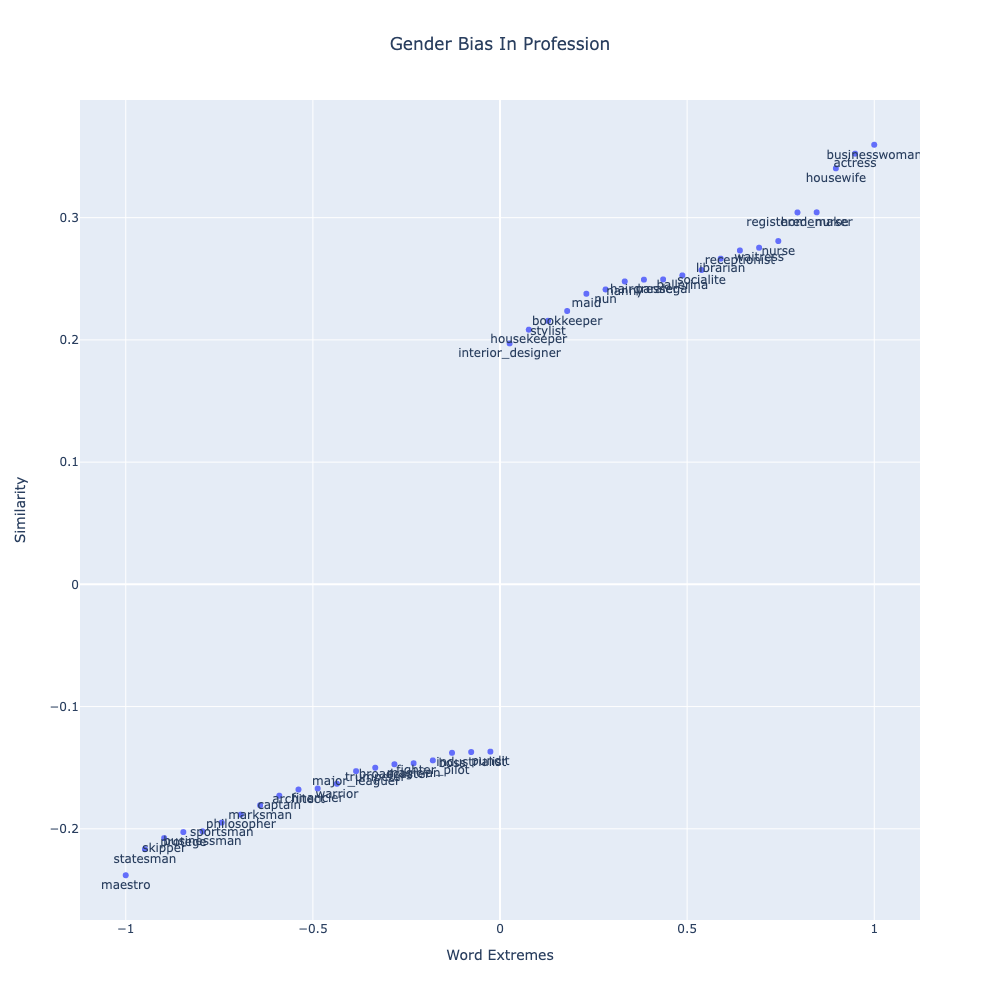

### Zoomed In - Male Quadrant

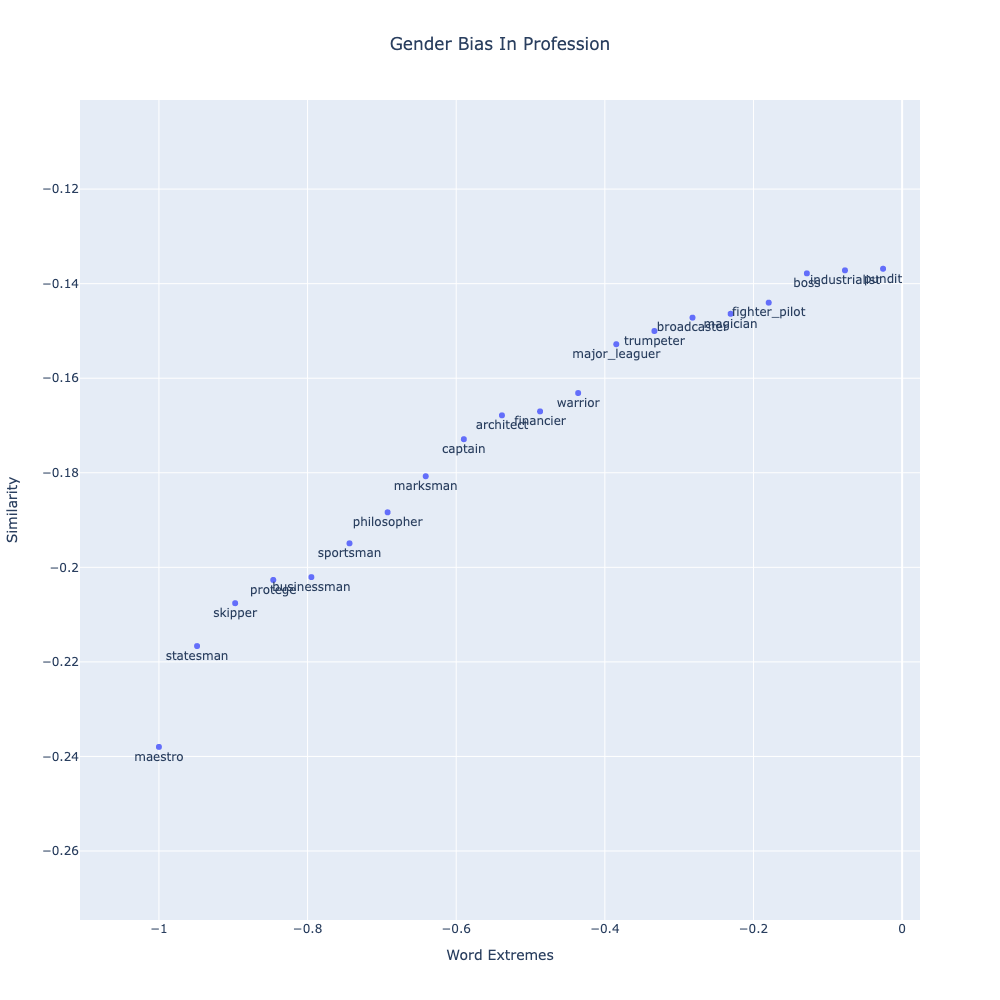

### Zoomed in Female Quadrant

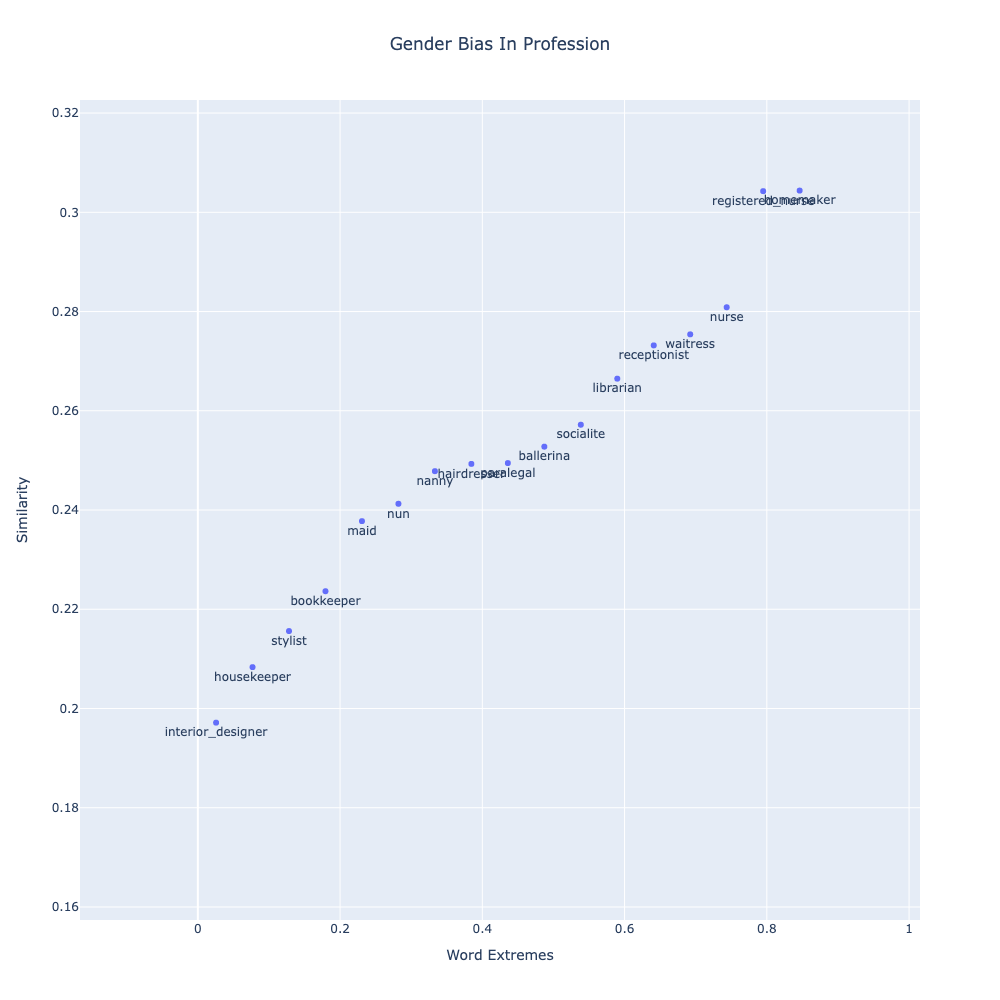

### Just a test to show how king - man + woman results in a vector which is very close to queen

In [ ]:

words_list = ['king', 'man', 'woman']
embedding_list = []

for i in words_list:
    ems = E.get_embedding(i)
    embedding_list.append(ems)

final_embed = embedding_list[0] - embedding_list[1] + embedding_list[2]
# print(final_embed.shape)

# print(get_me_queen)
queen_embed = E.get_embedding('queen')

print('Similarity with Queen', final_embed.dot(queen_embed.T))

Similarity with Queen 0.8006955


### 5: Racial Bias

### Define racial direction
The paper define racial direction based on the common names in different Demographic groups. 

In [ ]:
names = ["Emily", "Aisha", "Anne", "Keisha", "Jill", "Tamika", "Allison", "Lakisha", "Laurie", "Tanisha", "Sarah",
         "Latoya", "Meredith", "Kenya", "Carrie", "Latonya", "Kristen", "Ebony", "Todd", "Rasheed", "Neil", "Tremayne",
         "Geoffrey", "Kareem", "Brett", "Darnell", "Brendan", "Tyrone", "Greg", "Hakim", "Matthew", "Jamal", "Jay",
         "Leroy", "Brad", "Jermaine"]
names_group1 = [names[2 * i] for i in range(len(names) // 2)]
names_group2 = [names[2 * i + 1] for i in range(len(names) // 2)]

In [ ]:
# racial direction
vs = [sum(E.get_embedding(w) for w in names) for names in (names_group2, names_group1)]
vs = [v / np.linalg.norm(v) for v in vs]

v_racial = vs[1] - vs[0]
v_racial = v_racial / np.linalg.norm(v_racial)

### 6: Generating racial biased analogies

Similar to Step 3, we generate analogies that align with the racial dimension. 

In [ ]:
# racial analogies
a_racial = E.get_analogy_based_thresh(v_racial)

for (a,b,c) in a_racial:
    print(a+"-"+b)

Sarah-Keisha
defensemen-cornerbacks
hipster-hip_hop
punter-cornerback
singer_songwriter-rapper
defenseman-defensive_tackle
pole_vault-triple_jump
musicians-artistes
musician-artiste
catcher-wide_receiver
rock_n_roll-reggae
kicker-kick_returner
tavern-barbershop
freestyle_relay-meter_hurdles
lefthander-swingman
bacon-fried_chicken
artists-rappers
equipment-equipments
hockey-basketball
wool-cotton
unassisted_goal-layup
chocolates-sweets
buddy-cousin
priest-preacher
blue-black
medley_relay-meter_dash
quirky-funky
rabbi-imam
grapes-mango
telecommunications-telecommunication
pitchers-defensive_linemen
passages-verses
er-o
acoustic-soulful
punting-punt_returns
thefts-armed_robbery
bar-nightclub
digs-rebounds
Greg-Geoffrey
cellist-saxophonist
smarts-quickness
puck-halfcourt
quarterback-tailback
fox-leopard
pedophiles-rapists
potatoes-flour
en-el
infrastructure-infrastructural
evangelism-gospel
fiance-aunt
pointers-dunks
baseman-defensive_lineman
pedophile-rapist
joked-smiled
beer-soft_drink
g

### 7: Analyzing racial bias in word vectors asscoiated with professions

Similar to Step 4, we project occpurations onto the racial dimension.

In [ ]:
# profession analysis racial
sp = sorted([(E.get_embedding(w).dot(v_racial), w) for w in profession_words])

sp[0:20], sp[-20:]

([(-0.31546244, 'artiste'),
  (-0.27369624, 'shopkeeper'),
  (-0.27285585, 'taxi_driver'),
  (-0.24248753, 'cab_driver'),
  (-0.23096201, 'preacher'),
  (-0.21709058, 'boxer'),
  (-0.20973532, 'laborer'),
  (-0.20361689, 'barber'),
  (-0.1962502, 'cleric'),
  (-0.182731, 'bodyguard'),
  (-0.18250427, 'gangster'),
  (-0.1816296, 'singer'),
  (-0.16877083, 'maid'),
  (-0.16871038, 'entertainer'),
  (-0.16197538, 'cabbie'),
  (-0.15332885, 'housewife'),
  (-0.14839593, 'civil_servant'),
  (-0.14115772, 'policeman'),
  (-0.13648951, 'minister'),
  (-0.13296561, 'drug_addict')],
 [(0.08779256, 'organist'),
  (0.09007452, 'philanthropist'),
  (0.09135293, 'cinematographer'),
  (0.093180254, 'manager'),
  (0.09358391, 'investment_banker'),
  (0.096878394, 'professor_emeritus'),
  (0.097828984, 'curator'),
  (0.098648615, 'freelance_writer'),
  (0.099171564, 'programmer'),
  (0.10142014, 'screenwriter'),
  (0.101988465, 'author'),
  (0.10438656, 'inventor'),
  (0.106778406, 'adventurer'),
  (0

In [ ]:
plot_words_extreme(sp[:20], sp[-20:], 40, x_title='Word Extremes', y_title='Similarity', 
title='Racial Bias In Profession')

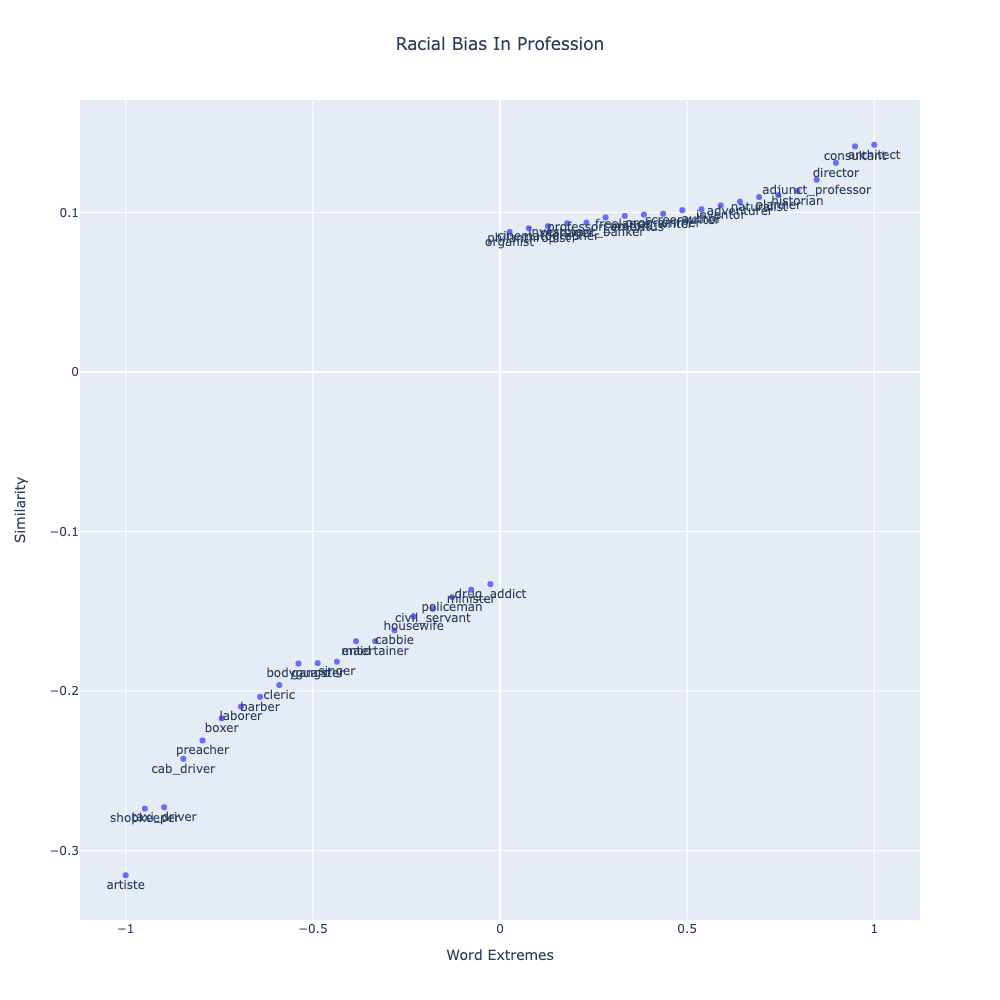

### Zoomed In version - Non-Whites

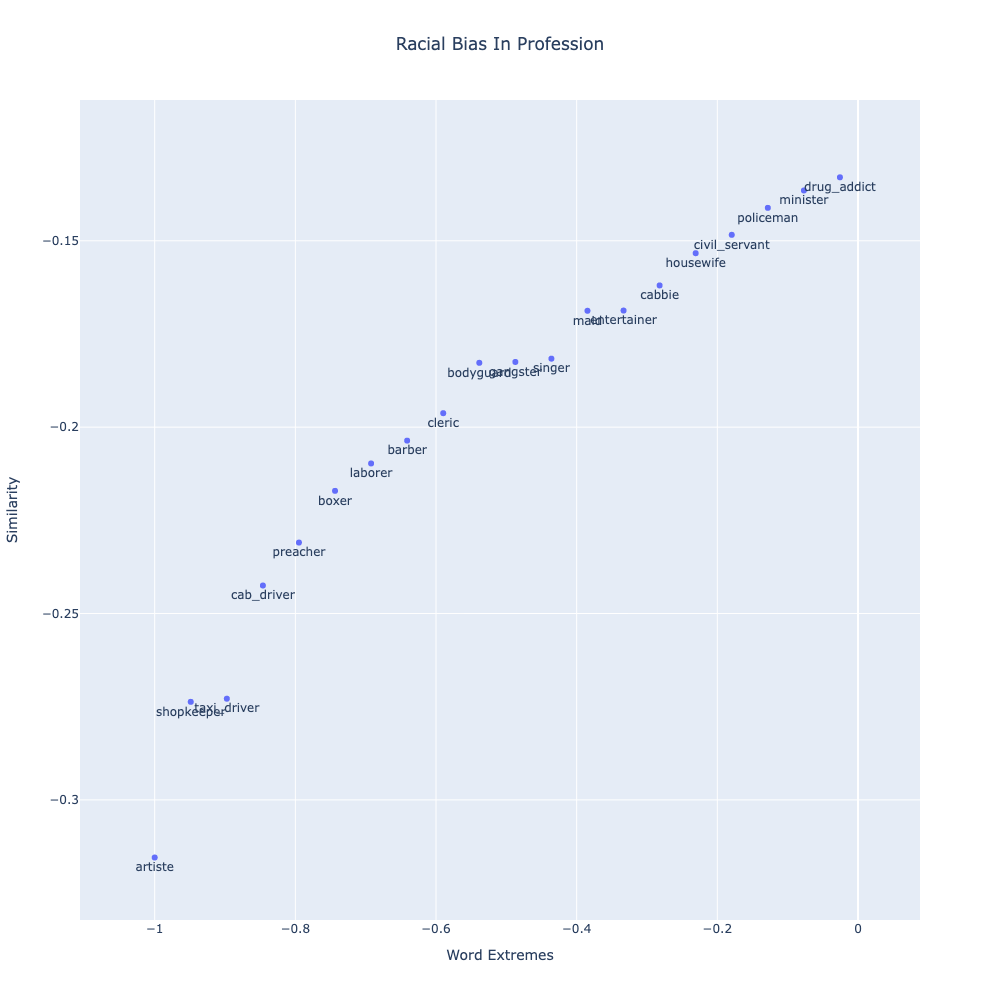

### Zoomed In - Whites

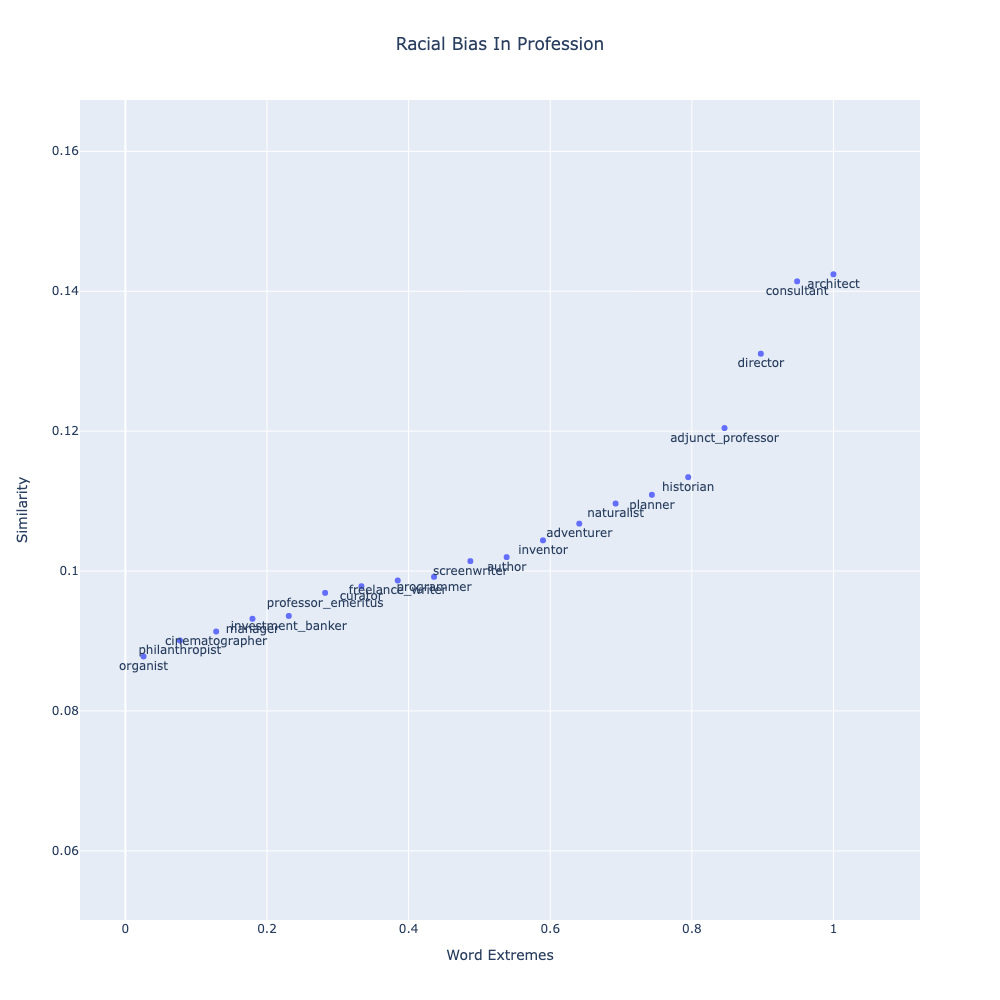

### 8: Debiasing

Repeat Step 2-4 with debiased word embedding. 

You can leave equalize_pairs and gender_specific_words blank when coming up with your own groups. We give an example for the case of gender below for you to warm up.

In [14]:
from sklearn.decomposition import PCA

def find_direction(pairs, embedding, num_components = 10):
    '''
        Identify the gender subspace
    '''
    matrix = []
    for a, b in pairs:
        center = (embedding.get_embedding(a) + embedding.get_embedding(b))/2
        matrix.append(embedding.get_embedding(a) - center)
        matrix.append(embedding.get_embedding(b) - center)
    matrix = np.array(matrix)
    pca = PCA(n_components = num_components)
    pca.fit(matrix)
    # bar(range(num_components), pca.explained_variance_ratio_)
    return pca

def drop(u, v):
    '''
        Align the words such that they are equidistant from 
        gender specific words
    '''
    return u - v * u.dot(v) / v.dot(v)

def debias_embeddings(E, gender_specific_words, definitional, equalize):
    '''
        Find gender direction and do hard debiasing.
    '''
    gender_direction = find_direction(definitional, E).components_[0]
    specific_set = set(gender_specific_words)
    for i, w in enumerate(E.words):
        if w not in specific_set:
            E.embeddings[i] = drop(E.embeddings[i], gender_direction)
    E.normalize()
    candidates = {x for e1, e2 in equalize for x in [(e1.lower(), e2.lower()),
                                                     (e1.title(), e2.title()),
                                                     (e1.upper(), e2.upper())]}
    print(candidates)
    for (a, b) in candidates:
        if (a in E.word2index and b in E.word2index):
            y = drop((E.get_embedding(a) + E.get_embedding(b)) / 2, gender_direction)
            z = np.sqrt(1 - np.linalg.norm(y)**2)
            if (E.get_embedding(a) - E.get_embedding(b)).dot(gender_direction) < 0:
                z = -z
            E.embeddings[E.word2index[a]] = z * gender_direction + y
            E.embeddings[E.word2index[b]] = -z * gender_direction + y
    E.normalize()


In [15]:
# words used to identify the gender subspace
with open('./data/definitional_pairs.json', "r") as f:
    defs = json.load(f)
print("definitional", defs)

# Equalize pairs ensure that neutral words are equidistant from both extremes 
with open('./data/equalize_pairs.json', "r") as f:
    equalize_pairs = json.load(f)

# words where gender specificity is desired
with open('./data/gender_specific_seed.json', "r") as f:
    gender_specific_words = json.load(f)
print("gender specific", len(gender_specific_words), gender_specific_words[:10])

definitional [['woman', 'man'], ['girl', 'boy'], ['she', 'he'], ['mother', 'father'], ['daughter', 'son'], ['gal', 'guy'], ['female', 'male'], ['her', 'his'], ['herself', 'himself'], ['Mary', 'John']]
gender specific 218 ['actress', 'actresses', 'aunt', 'aunts', 'bachelor', 'ballerina', 'barbershop', 'baritone', 'beard', 'beards']


In [16]:
debias_embeddings(E, gender_specific_words, defs, equalize_pairs)

{('uncle', 'aunt'), ('Father', 'Mother'), ('nephew', 'niece'), ('councilman', 'councilwoman'), ('monastery', 'convent'), ('Males', 'Females'), ('colt', 'filly'), ('fathers', 'mothers'), ('male', 'female'), ('Chairman', 'Chairwoman'), ('Councilman', 'Councilwoman'), ('Man', 'Woman'), ('FATHER', 'MOTHER'), ('Uncle', 'Aunt'), ('gentleman', 'lady'), ('UNCLE', 'AUNT'), ('GELDING', 'MARE'), ('himself', 'herself'), ('His', 'Her'), ('DUDES', 'GALS'), ('spokesman', 'spokeswoman'), ('COUNCILMAN', 'COUNCILWOMAN'), ('CHAIRMAN', 'CHAIRWOMAN'), ('PRINCE', 'PRINCESS'), ('Schoolboy', 'Schoolgirl'), ('King', 'Queen'), ('men', 'women'), ('GENTLEMEN', 'LADIES'), ('Prince', 'Princess'), ('dad', 'mom'), ('CONGRESSMAN', 'CONGRESSWOMAN'), ('FATHERHOOD', 'MOTHERHOOD'), ('Nephew', 'Niece'), ('father', 'mother'), ('king', 'queen'), ('chairman', 'chairwoman'), ('grandsons', 'granddaughters'), ('GRANDPA', 'GRANDMA'), ('MONASTERY', 'CONVENT'), ('Congressman', 'Congresswoman'), ('CATHOLIC_PRIEST', 'NUN'), ('MALES',

In [17]:
# profession analysis gender
sp_debiased = sorted([(E.get_embedding(w).dot(v_gender), w) for w in profession_words])

sp_debiased[0:20], sp_debiased[-20:]

([(-0.41963255, 'congressman'),
  (-0.4067585, 'businessman'),
  (-0.32398778, 'councilman'),
  (-0.30967093, 'dad'),
  (-0.21665451, 'statesman'),
  (-0.11345412, 'salesman'),
  (-0.07300485, 'monk'),
  (-0.072163954, 'handyman'),
  (-0.049468227, 'minister'),
  (-0.0435838, 'archbishop'),
  (-0.040207177, 'bishop'),
  (-0.038332473, 'commissioner'),
  (-0.035724334, 'surgeon'),
  (-0.033133987, 'trader'),
  (-0.032377183, 'observer'),
  (-0.032095842, 'neurosurgeon'),
  (-0.031450097, 'priest'),
  (-0.031134002, 'skipper'),
  (-0.029659105, 'lawmaker'),
  (-0.029511211, 'commander')],
 [(0.029965647, 'teenager'),
  (0.030237056, 'instructor'),
  (0.030946203, 'student'),
  (0.031116977, 'paralegal'),
  (0.03203943, 'bookkeeper'),
  (0.032434605, 'cinematographer'),
  (0.034329113, 'graphic_designer'),
  (0.034705695, 'lifeguard'),
  (0.035666473, 'janitor'),
  (0.03597185, 'drummer'),
  (0.042120118, 'wrestler'),
  (0.043902304, 'hairdresser'),
  (0.04813315, 'firefighter'),
  (0.237

In [18]:
plot_words_extreme(sp_debiased[:20], sp_debiased[-20:], 40, x_title='Word Extremes', y_title='Similarity', 
title='Debiased Gender - Profession')

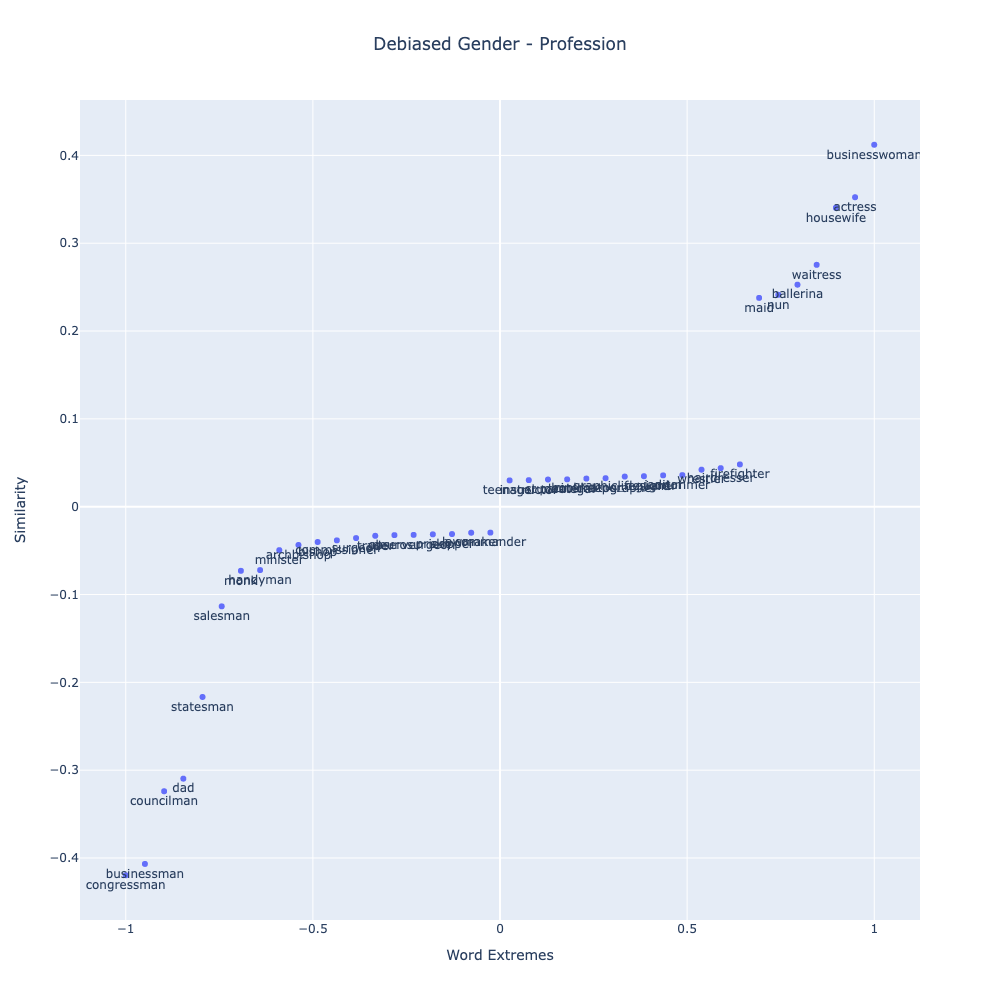

### Zoomed in version - Male Quadrant

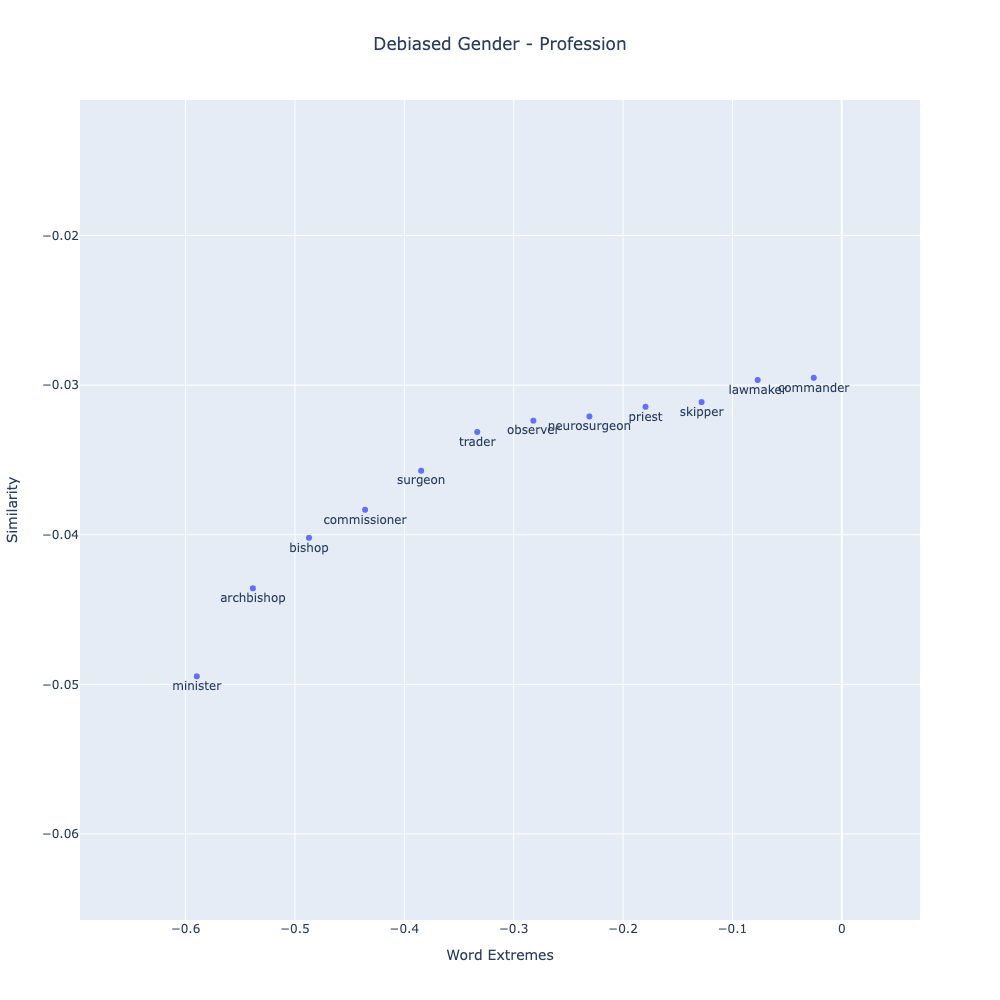

### Zoomed in version - Female quadrant

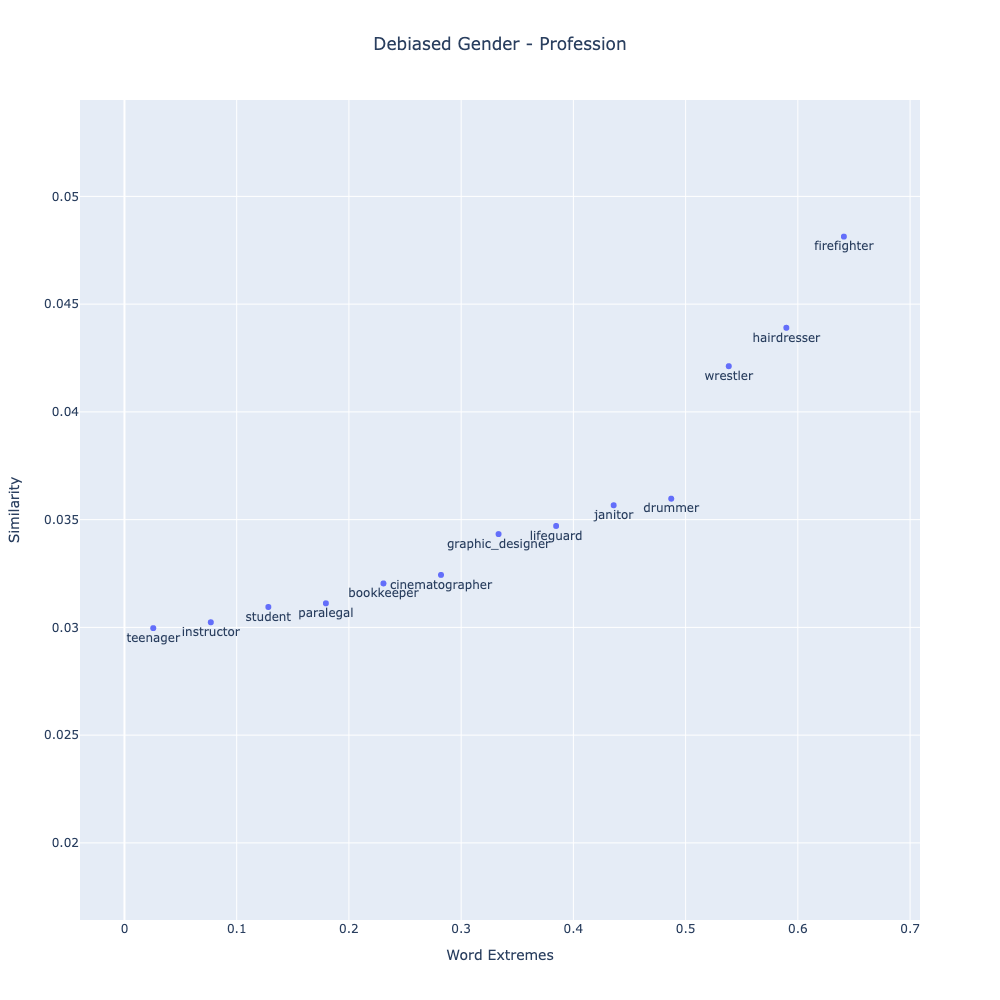

In [ ]:
# analogies gender
a_gender_debiased = E.get_analogy_based_thresh(v_gender)

for (a,b,c) in a_gender_debiased:
    print(a+"::"+b)

she::he
herself::himself
her::his
woman::man
daughter::son
businesswoman::businessman
girl::boy
actress::actor
chairwoman::chairman
heroine::hero
mother::father
spokeswoman::spokesman
sister::brother
girls::boys
sisters::brothers
queen::king
niece::nephew
councilwoman::councilman
motherhood::fatherhood
women::men
petite::lanky
ovarian_cancer::prostate_cancer
Anne::John
schoolgirl::schoolboy
granddaughter::grandson
aunt::uncle
matriarch::patriarch
twin_sister::twin_brother
mom::dad
lesbian::gay
husband::younger_brother
gal::dude
lady::gentleman
sorority::fraternity
mothers::fathers
grandmother::grandfather
blouse::shirt
soprano::baritone
queens::kings
Jill::Greg
daughters::sons
grandma::grandpa
volleyball::football
diva::superstar
mommy::kid
Sarah::Matthew
hairdresser::barber
softball::baseball
goddess::god
Aisha::Jamal
waitress::waiter
princess::prince
filly::colt
mare::gelding
ladies::gentlemen
childhood::boyhood
interior_designer::architect
nun::priest
wig::beard
granddaughters::gran

### Save the debiased Embeddings for later use

In [19]:
E.save_embeddings('./embeddings/debiased_embeddings.npy')